In [1]:
from ucimlrepo import fetch_ucirepo 
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import random
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
from logistic_regression import LogisticRegression

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# fetch dataset 
dataset = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = dataset.data.features 
y = dataset.data.targets 

num_classes = len(y.Diagnosis.unique())
num_features = len(X.columns)

# X.shape = (569, 30) -> (sample_num, features_num) features has different mean variance
# y.shape = (569, 1)  -> (sample_num, diagnosis) M or B

# metadata (information about dataset)
# print(dataset.metadata) 
  
# variable information 
# print(dataset.variables.name[31]) 
# print(len(dataset.variables))

# y.Diagnosis.hist()

In [4]:
set = [X, y]
X = pd.concat(set, axis=1)

<Axes: >

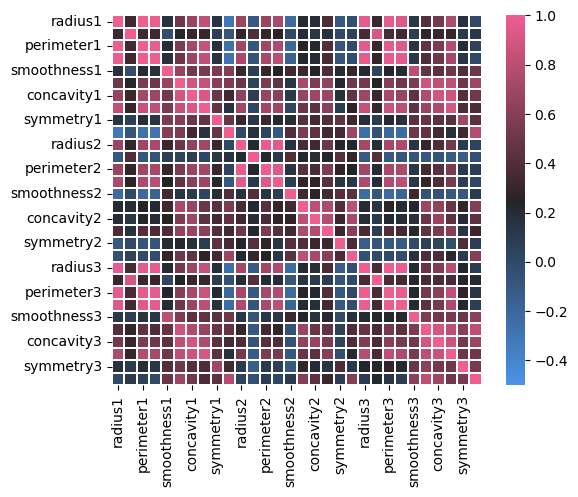

In [5]:
# Correlation matrix
corr = X.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2) 

In [6]:
# Table of input values
X.head(10)

radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   
5    12.45     15.70       82.57   477.1      0.12780       0.17000   
6    18.25     19.98      119.60  1040.0      0.09463       0.10900   
7    13.71     20.83       90.20   577.9      0.11890       0.16450   
8    13.00     21.82       87.50   519.8      0.12730       0.19320   
9    12.46     24.04       83.97   475.9      0.11860       0.23960   

   concavity1  concave_points1  symmetry1  fractal_dimension1  radius2  \
0     0.30010          0.14710     0.2419             0.07871   1.0950   
1     0.08690          0.07017     0.1812             0.05667   0.5435   
2     0.19740          0.12790     0.2069             0.05999   0.7456   
3     0.24140          0.10520     0.2597             0.09744   0.4956   
4     0.19800          0.10430     0.1809             0.05883   0.7572   
5     0.15780          0.08089     0.2087             0.07613   0.3345   
6     0.11270          0.07400     0.1794             0.05742   0.4467   
7     0.09366          0.05985     0.2196             0.07451   0.5835   
8     0.18590          0.09353     0.2350             0.07389   0.3063   
9     0.22730          0.08543     0.2030             0.08243   0.2976   

   texture2  perimeter2   area2  smoothness2  compactness2  concavity2  \
0    0.9053       8.589  153.40     0.006399       0.04904     0.05373   
1    0.7339       3.398   74.08     0.005225       0.01308     0.01860   
2    0.7869       4.585   94.03     0.006150       0.04006     0.03832   
3    1.1560       3.445   27.23     0.009110       0.07458     0.05661   
4    0.7813       5.438   94.44     0.011490       0.02461     0.05688   
5    0.8902       2.217   27.19     0.007510       0.03345     0.03672   
6    0.7732       3.180   53.91     0.004314       0.01382     0.02254   
7    1.3770       3.856   50.96     0.008805       0.03029     0.02488   
8    1.0020       2.406   24.32     0.005731       0.03502     0.03553   
9    1.5990       2.039   23.94     0.007149       0.07217     0.07743   

   concave_points2  symmetry2  fractal_dimension2  radius3  texture3  \
0          0.01587    0.03003            0.006193    25.38     17.33   
1          0.01340    0.01389            0.003532    24.99     23.41   
2          0.02058    0.02250            0.004571    23.57     25.53   
3          0.01867    0.05963            0.009208    14.91     26.50   
4          0.01885    0.01756            0.005115    22.54     16.67   
5          0.01137    0.02165            0.005082    15.47     23.75   
6          0.01039    0.01369            0.002179    22.88     27.66   
7          0.01448    0.01486            0.005412    17.06     28.14   
8          0.01226    0.02143            0.003749    15.49     30.73   
9          0.01432    0.01789            0.010080    15.09     40.68   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0       0.1622        0.6656      0.7119           0.2654   
1      158.80  1956.0       0.1238        0.1866      0.2416           0.1860   
2      152.50  1709.0       0.1444        0.4245      0.4504           0.2430   
3       98.87   567.7       0.2098        0.8663      0.6869           0.2575   
4      152.20  1575.0       0.1374        0.2050      0.4000           0.1625   
5      103.40   741.6       0.1791        0.5249      0.5355           0.1741   
6      153.20  1606.0       0.1442        0.2576      0.3784           0.1932   
7      110.60   897.0       0.1654        0.3682      0.2678           0.1556   
8      106.20   739.3       0.1703        0.5401      0.5390         

<Axes: xlabel='compactness2', ylabel='Count'>

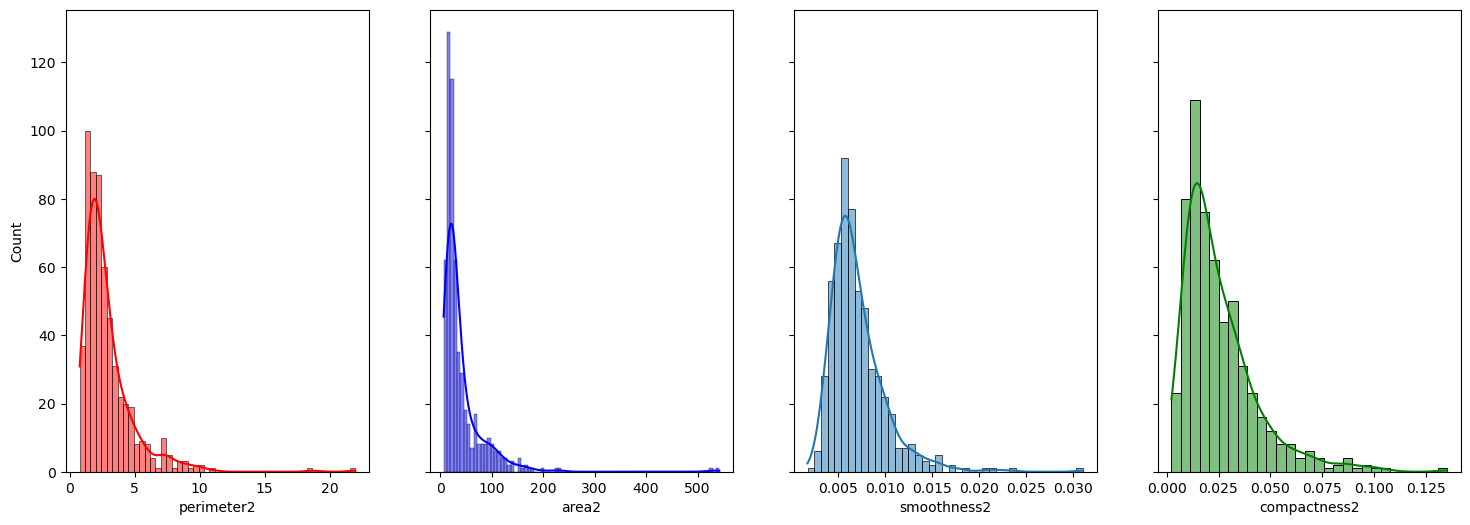

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=True)
sns.histplot(X, ax=axes[0], x="perimeter2", kde=True, color='r')
sns.histplot(X, ax=axes[1], x="area2", kde=True, color='b')
sns.histplot(X, ax=axes[2], x="smoothness2", kde=True)
sns.histplot(X, ax=axes[3], x="compactness2", kde=True, color='g')

In [8]:
# Split dataset into training and testing subsets
def train_test_split(X, test_ratio=0.1, random_seed=None):

    if random_seed:
        random.seed(random_seed)
    
    # Shuffle the indices
    indices = list(range(len(X)))
    random.shuffle(indices)
    
    # Calculate the number of samples for the testing set
    test_size = int(len(X) * test_ratio)
    train_size = len(X) - test_size
    
    # Create the training and testing subsets
    X_train = X.sample(train_size)
    X_test = X.sample(test_size)
    
    return X_train, X_test


X_train, X_test = train_test_split(X, 0.1, 42)

y_train = X_train.Diagnosis
y_train = y_train.to_numpy().reshape(-1, 1)
y_train = np.asarray(y_train, dtype=str)

y_test = X_test.Diagnosis
y_test = y_test.to_numpy().reshape(-1, 1)
y_test= np.asarray(y_test, dtype=str)


In [9]:
# Split data to classes
class_M = X_train[X_train['Diagnosis'] == 'M']
class_B = X_train[X_train['Diagnosis'] == 'B']

In [10]:
# Calculate the means and variances of the features
prior_m = len(class_M)/len(X_train)
prior_b = len(class_B)/len(X_train)

means = []
variances = []
for i in range (2,len(dataset.variables)):
    means.append(np.mean(X_train[dataset.variables.name[i]]))
    variances.append(np.var(X_train[dataset.variables.name[i]]))
    
means_m = []
variances_m = []
for i in range (2,len(dataset.variables)):
    means_m.append(np.mean(class_M[dataset.variables.name[i]]))
    variances_m.append(np.var(class_M[dataset.variables.name[i]]))

means_b = []
variances_b = []
for i in range (2,len(dataset.variables)):
    means_b.append(np.mean(class_B[dataset.variables.name[i]]))
    variances_b.append(np.var(class_B[dataset.variables.name[i]]))


In [11]:
# Predict
def predict(samples):
    posterior_m = prior_m
    posterior_b = prior_b

    predictions = []

    for sample in samples: # for all samples
        for i in range (30): # for all features

            likelihood_m = (1/(np.sqrt(2*np.pi*variances_m[i])))*np.exp(-((sample[i]-means_m[i])**2)/(2*variances_m[i]))
            likelihood_b = (1/(np.sqrt(2*np.pi*variances_b[i])))*np.exp(-((sample[i]-means_b[i])**2)/(2*variances_b[i]))
            posterior_m = posterior_m * likelihood_m
            posterior_b = posterior_b * likelihood_b

        if(posterior_m > posterior_b):
            predictions.append(1)
        else:
            predictions.append(0)
        
        posterior_b = prior_b
        posterior_m = prior_m
            
    return predictions
    


In [18]:
# Training Performance
x_train = []
for i in range (2,32):
    x_train.append(X_train[dataset.variables.name[i]].to_numpy())
x_train = np.array(x_train).T

Y_train = np.zeros((len(y_train)))
for i in range(len(y_train)):
    if y_train[i] == 'M':
        Y_train[i] = 1

Y_pred = predict(x_train)

print("Training Set Accuracy:")
print(confusion_matrix(Y_train, Y_pred))
print(f1_score(Y_train, Y_pred))
print()

# Testing Performance 
x_test = []
for i in range (2,32):
    x_test.append(X_test[dataset.variables.name[i]].to_numpy())
x_test = np.array(x_test).T

Y_test = np.zeros((len(y_test)))
for i in range(len(y_test)):
    if y_test[i] == 'M':
        Y_test[i] = 1

Y_pred = predict(x_test)

print("Test Set Accuracy:")
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

Training Set Accuracy:
[[315  13]
 [ 21 164]]
0.9060773480662984

Test Set Accuracy:
[[37  1]
 [ 1 17]]
0.9444444444444444


In [13]:
model = LogisticRegression(X_test)

In [14]:
model.clip_feature(0, 4, 25)
model.clip_feature(1, 9, 32)
model.clip_feature(2, 40, 170)
model.clip_feature(3, 200, 1700)

model.clip_feature(4, 0.06, 0.14)
model.clip_feature(5, 0.0, 0.3)
model.clip_feature(6, 0.0, 0.35)

model.clip_feature(8, 0.001, 0.003)
model.clip_feature(9, 0.049, 0.09)
model.clip_feature(10, 0.0, 1.5)
model.clip_feature(11, 0.0, 3.5)

model.clip_feature(12, 0.0, 10.0)
model.clip_feature(13, 0, 200)
model.clip_feature(14, 0.000, 0.020)
model.clip_feature(15, 0.00, 0.10)

model.clip_feature(16, 0.0, 0.15)
model.clip_feature(17, 0.00, 0.35)
model.clip_feature(18, 0.00, 0.055)
model.clip_feature(19, 0.00, 0.14)

model.clip_feature(23, 0.00, 3000)
model.clip_feature(28, 0.00, 0.40)
model.clip_feature(29, 0.05, 0.125)

model.scale_features()

In [19]:
model.split_data(0.9)

In [21]:
model.GD(0.02, 8000)

Iteration:  0
	Training accuracy:  0.32
	Test accuracy:  0.3333333333333333
Iteration:  1
	Training accuracy:  0.42
	Test accuracy:  0.3333333333333333
Iteration:  2
	Training accuracy:  0.5
	Test accuracy:  0.3333333333333333
Iteration:  3
	Training accuracy:  0.66
	Test accuracy:  0.5
Iteration:  4
	Training accuracy:  0.74
	Test accuracy:  0.6666666666666666
Iteration:  5
	Training accuracy:  0.8
	Test accuracy:  0.8333333333333334
Iteration:  6
	Training accuracy:  0.8
	Test accuracy:  0.6666666666666666
Iteration:  7
	Training accuracy:  0.8
	Test accuracy:  0.6666666666666666
Iteration:  8
	Training accuracy:  0.84
	Test accuracy:  0.6666666666666666
Iteration:  9
	Training accuracy:  0.82
	Test accuracy:  0.6666666666666666
Iteration:  10
	Training accuracy:  0.8
	Test accuracy:  0.6666666666666666
Iteration:  11
	Training accuracy:  0.82
	Test accuracy:  0.6666666666666666
Iteration:  12
	Training accuracy:  0.82
	Test accuracy:  0.6666666666666666
Iteration:  13
	Training accu

In [22]:
model.GD(0.01, 60000, lambda_power=-3)

Iteration:  0
	Training accuracy:  0.68
	Test accuracy:  0.6666666666666666
Iteration:  1
	Training accuracy:  0.68
	Test accuracy:  0.6666666666666666
Iteration:  2
	Training accuracy:  0.68
	Test accuracy:  0.6666666666666666
Iteration:  3
	Training accuracy:  0.7
	Test accuracy:  0.6666666666666666
Iteration:  4
	Training accuracy:  0.7
	Test accuracy:  0.6666666666666666
Iteration:  5
	Training accuracy:  0.72
	Test accuracy:  0.6666666666666666
Iteration:  6
	Training accuracy:  0.72
	Test accuracy:  0.6666666666666666
Iteration:  7
	Training accuracy:  0.72
	Test accuracy:  0.6666666666666666
Iteration:  8
	Training accuracy:  0.72
	Test accuracy:  0.6666666666666666
Iteration:  9
	Training accuracy:  0.72
	Test accuracy:  0.6666666666666666
Iteration:  10
	Training accuracy:  0.74
	Test accuracy:  0.6666666666666666
Iteration:  11
	Training accuracy:  0.74
	Test accuracy:  0.6666666666666666
Iteration:  12
	Training accuracy:  0.76
	Test accuracy:  0.6666666666666666
Iteration: 